<a href="https://colab.research.google.com/github/mapi223/JUMPlus/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv
Saving Video_Games_Sales_Truncated.csv to Video_Games_Sales_Truncated.csv


In [11]:
T_csv_file_path = '/Video_Games_Sales_Truncated.csv'
Full_csv_file_path = '/Video_Games_Sales_as_at_22_Dec_2016.csv'

try:
    tf = pandas.read_csv(T_csv_file_path)
    df = pandas.read_csv(Full_csv_file_path)
except FileNotFoundError:
    print(f"File '{T_csv_file_path}' not found.")
    print(f"File '{Full_csv_file_path}' not found.")
except pandas.errors.EmptyDataError:
    print(f"File '{T_csv_file_path}' is empty.")
    print(f"File '{Full_csv_file_path}' is empty.")
except pandas.errors.ParserError:
    print(f"Error parsing the CSV file '{T_csv_file_path}'. Check the file format.")
    print(f"Error parsing the CSV file '{Full_csv_file_path}'. Check the file format.")
except Exception as e:
    print("An error occurred:", e)
    print("An error occurred:", e)

In [12]:
# Show the first 5 records
print("First 5 records of Full data set:")
print(df.head())
print("First 5 records of Truncated data set:")
print(tf.head())

# Show all the columns
print("All columns in Full data set:")
print(df.columns)
print("All columns in Truncated data set:")
print(tf.columns)

# Show the last 5 records
print("Last 5 records of Full data set:")
print(df.tail())
print("Last 5 records of Truncated data set:")
print(tf.tail())

First 5 records of Full data set:
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_

The 5 insights
1. Genre distribution
2. Global Sales over Time
3. Platform Popularity
4. Sales by Region
5. Correlation bewteen ratings and Sales


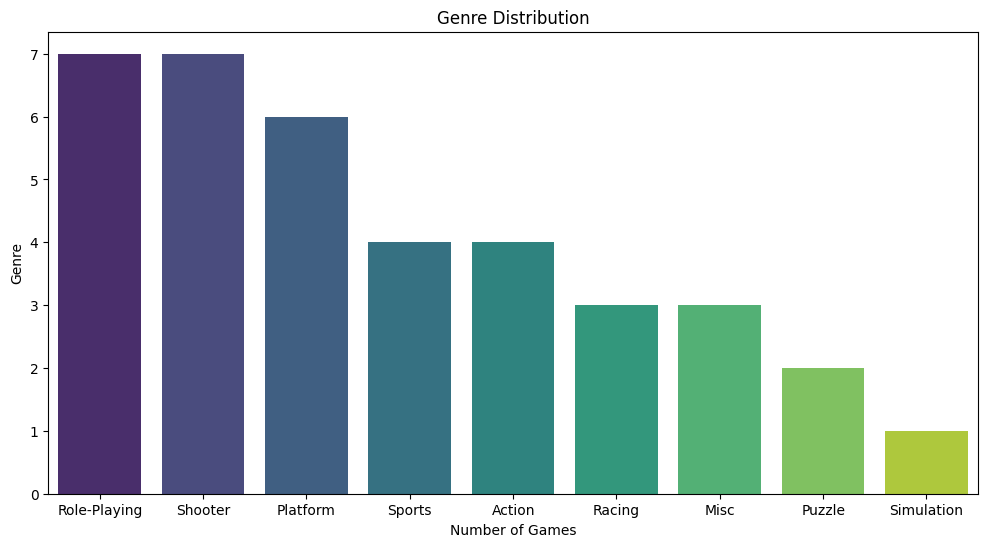

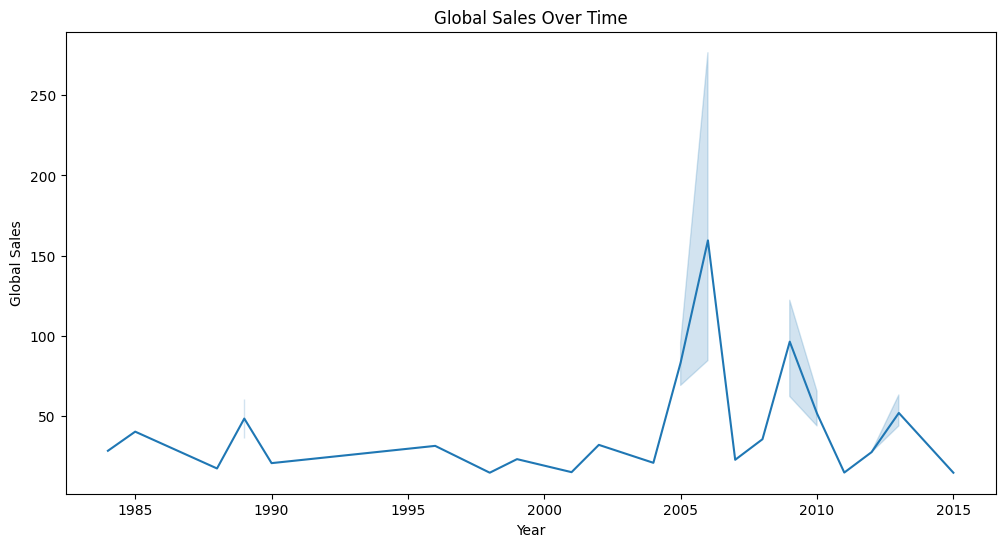

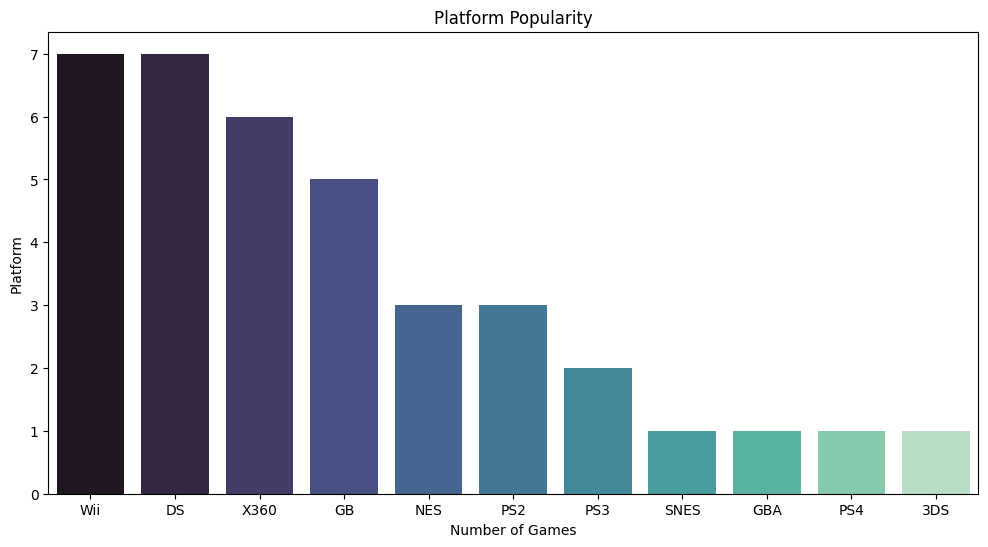

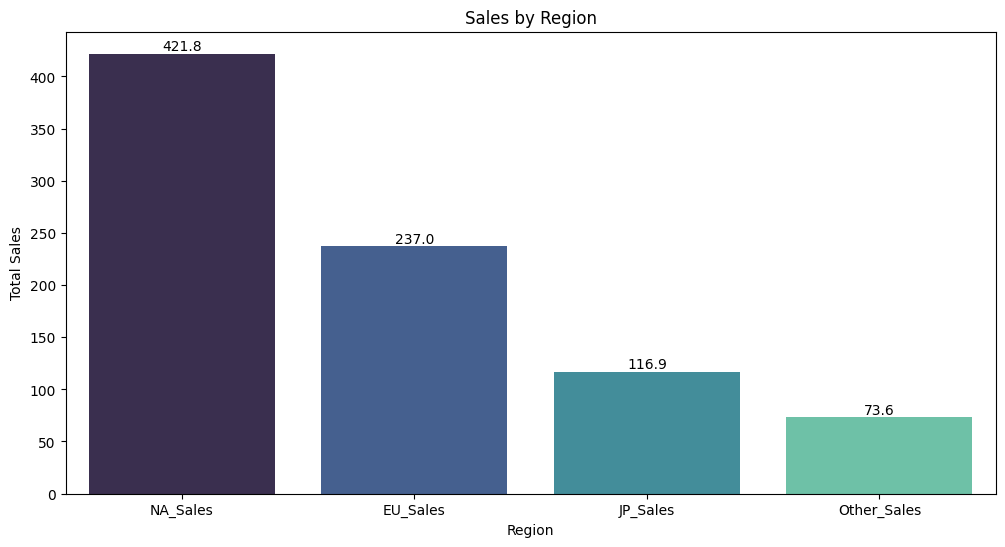

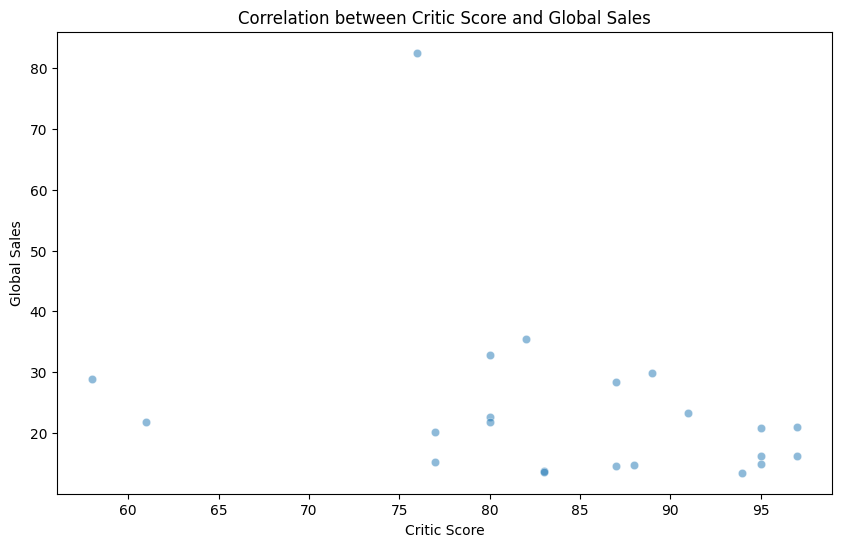

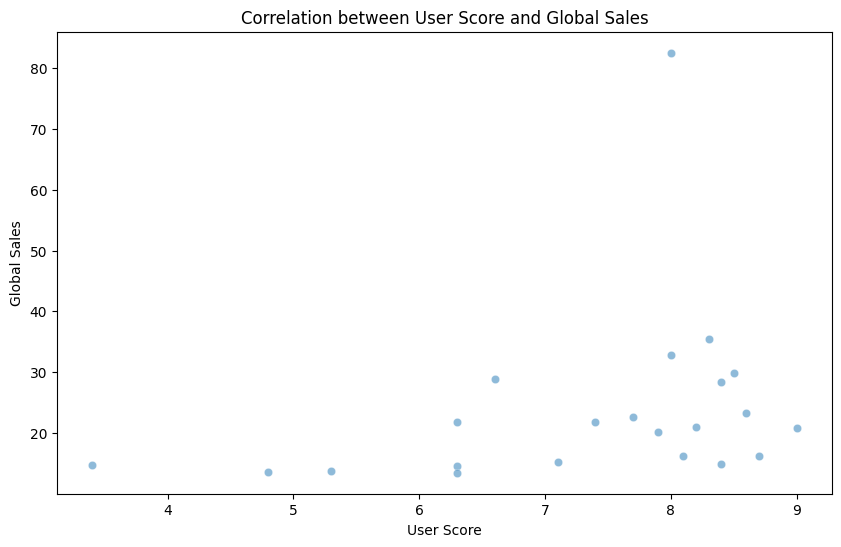

In [32]:
#Truncated figures
# Insight 1: Genre Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=tf, x='Genre', order=tf['Genre'].value_counts().index, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

# Insight 2: Global Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=tf, x='Year_of_Release', y='Global_Sales', estimator='sum')
plt.title('Global Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()

# Insight 3: Platform Popularity
plt.figure(figsize=(12, 6))
sns.countplot(data=tf, x='Platform', order=tf['Platform'].value_counts().index, palette='mako')
plt.title('Platform Popularity')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.show()

# Insight 4: Sales by Region
region_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_sales = tf[region_columns].sum()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=region_sales.reset_index(), x='index', y=0, palette='mako')

plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Insight 5: Correlation between Ratings and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tf, x='Critic_Score', y='Global_Sales', alpha=0.5)
plt.title('Correlation between Critic Score and Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tf, x='User_Score', y='Global_Sales', alpha=0.5)
plt.title('Correlation between User Score and Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales')
plt.show()

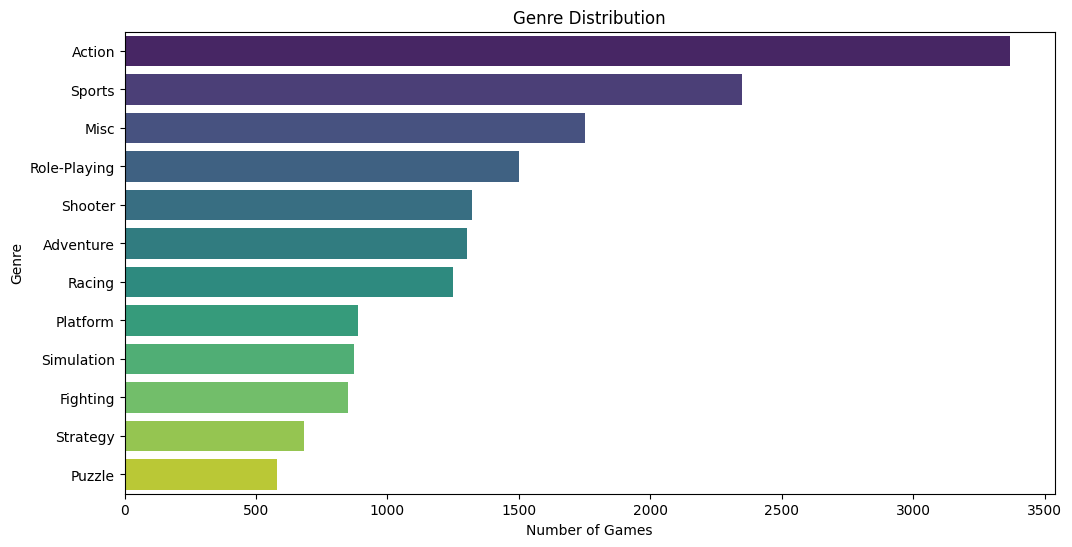

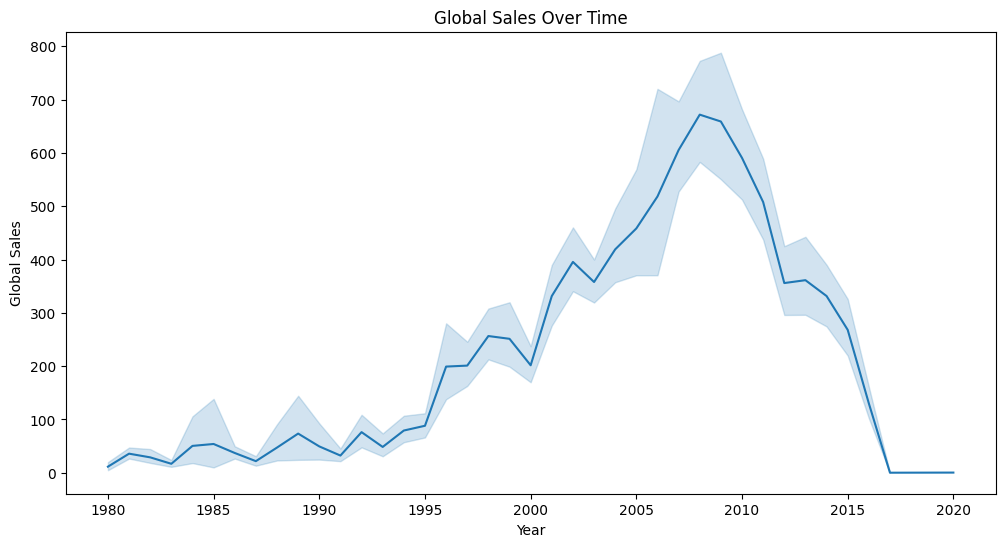

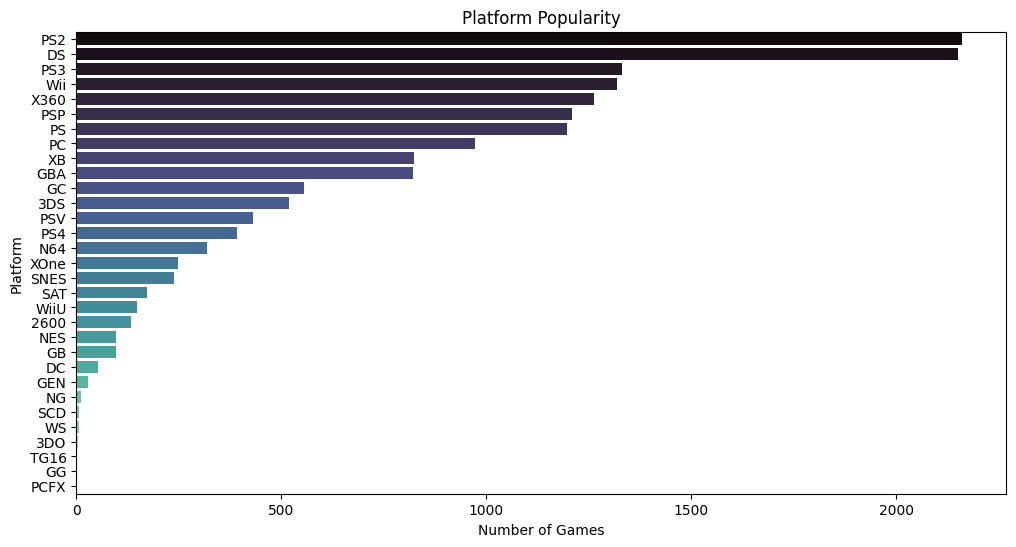

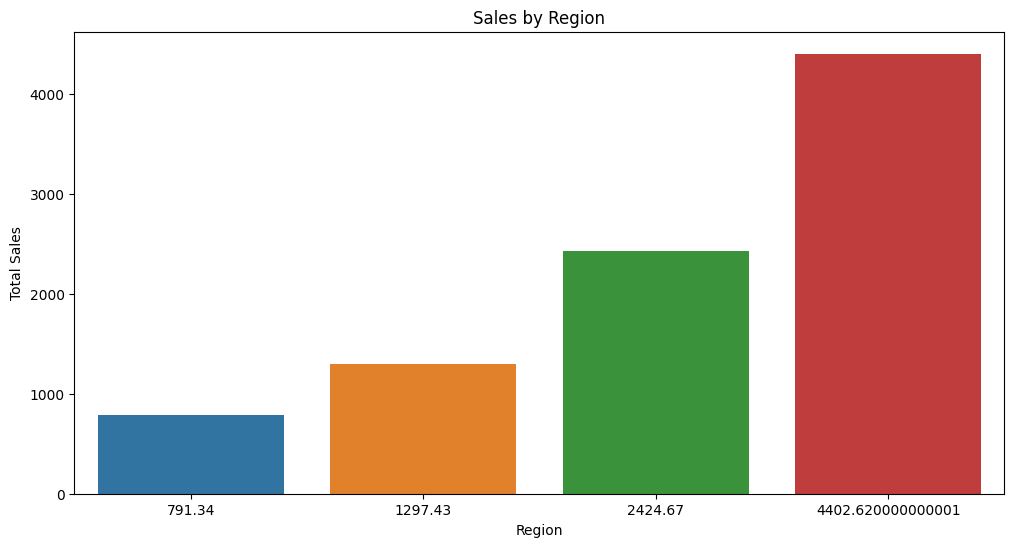

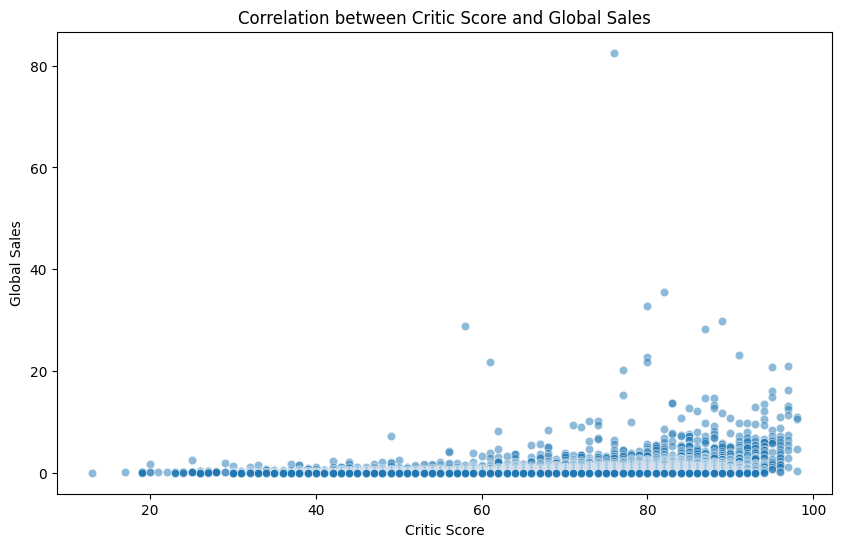

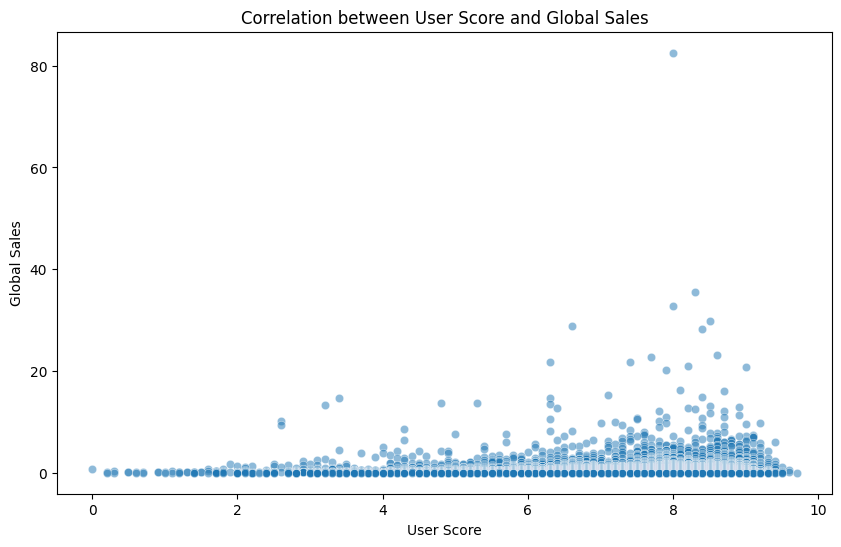

In [18]:
#Full dataset figures
# Insight 1: Genre Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

# Insight 2: Global Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year_of_Release', y='Global_Sales', estimator='sum')
plt.title('Global Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()

# Insight 3: Platform Popularity
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Platform', order=df['Platform'].value_counts().index, palette='mako')
plt.title('Platform Popularity')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.show()

# Insight 4: Sales by Region
region_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(12, 6))
sns.barplot(data=df[region_columns].sum(), x=region_columns, y=region_columns)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Insight 5: Correlation between Ratings and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Critic_Score', y='Global_Sales', alpha=0.5)
plt.title('Correlation between Critic Score and Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='User_Score', y='Global_Sales', alpha=0.5)
plt.title('Correlation between User Score and Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales')
plt.show()

No the truncated dataset is not useful. It incorrectly shows certain genres and platforms overperforming in terms. It also incorrectly protrays critics and users having differing overall opinions when looking at the full dataset they align better.
